In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import datetime


#Libreria para matriz de confusión
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

#Procesamiento de imágenes
import os,sys
import cv2
import fnmatch
import pandas as pd

print(tf.__version__)

2.9.2


## Importar el set de datos de señales de transito

In [ ]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB-Training_fixed.zip

--2022-11-28 19:18:27--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB-Training_fixed.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187490228 (179M) [application/zip]
Saving to: ‘GTSRB-Training_fixed.zip’

GTSRB-Training_fixe 100%[===================>] 178.80M  26.3MB/s    in 7.8s    

2022-11-28 19:18:36 (22.9 MB/s) - ‘GTSRB-Training_fixed.zip’ saved [187490228/187490228]



In [ ]:
!unzip GTSRB-Training_fixed.zip

In [ ]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_GT.zip

--2022-11-28 19:18:45--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_GT.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99620 (97K) [application/zip]
Saving to: ‘GTSRB_Final_Test_GT.zip’

GTSRB_Final_Test_GT 100%[===================>]  97.29K   293KB/s    in 0.3s    

2022-11-28 19:18:45 (293 KB/s) - ‘GTSRB_Final_Test_GT.zip’ saved [99620/99620]



In [ ]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip

--2022-11-28 19:18:46--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88978620 (85M) [application/zip]
Saving to: ‘GTSRB_Final_Test_Images.zip’

GTSRB_Final_Test_Im 100%[===================>]  84.86M  20.7MB/s    in 4.1s    

2022-11-28 19:18:50 (20.7 MB/s) - ‘GTSRB_Final_Test_Images.zip’ saved [88978620/88978620]



In [ ]:
!unzip GTSRB_Final_Test_Images.zip

In [ ]:
!unzip GTSRB_Final_Test_GT.zip

Archive:  GTSRB_Final_Test_GT.zip
  inflating: GT-final_test.csv       


## Lectura de imágenes

Usamos la librería cv2

### Lectura de imágenes de entrenamiento

In [ ]:
train_path = '/content/GTSRB/Training/'
test_path = '/content/GTSRB/Final_Test/Images/'

In [ ]:
!ls

dataset.zip	   GTSRB_Final_Test_GT.zip	sample_data
GT-final_test.csv  GTSRB_Final_Test_Images.zip
GTSRB		   GTSRB-Training_fixed.zip


Acá quedó el intento de usar keras, pero no salió si no nos sirve lo sacamos al final

In [ ]:
# from tensorflow import keras

# train_ds = keras.utils.image_dataset_from_directory(
#     directory='Training',
#     labels='inferred',
#     label_mode='categorical',
#     batch_size=32,
#     image_size=(28, 28))
# # validation_ds = keras.utils.image_dataset_from_directory(
# #     directory='validation_data/',
# #     labels='inferred',
# #     label_mode='categorical',
# #     batch_size=32,
# #     image_size=(256, 256))


In [ ]:
dir_list = os.listdir(train_path)
dir_list.sort()
dir_list

['00000',
 '00001',
 '00002',
 '00003',
 '00004',
 '00005',
 '00006',
 '00007',
 '00008',
 '00009',
 '00010',
 '00011',
 '00012',
 '00013',
 '00014',
 '00015',
 '00016',
 '00017',
 '00018',
 '00019',
 '00020',
 '00021',
 '00022',
 '00023',
 '00024',
 '00025',
 '00026',
 '00027',
 '00028',
 '00029',
 '00030',
 '00031',
 '00032',
 '00033',
 '00034',
 '00035',
 '00036',
 '00037',
 '00038',
 '00039',
 '00040',
 '00041',
 '00042',
 'Readme.txt']

In [ ]:
imgs = []
imgs_labels = []
imgs_classes = []
for dir in dir_list:
    if dir != 'Readme.txt':
      imgs_classes.append(dir)

      imgs_dir = fnmatch.filter(os.listdir(train_path + dir), '*.ppm')
      imgs.append(imgs_dir)
      imgs_labels.append([int(dir)] * len(imgs_dir))


In [ ]:
imgs_procesadas = []

for i in range(len(imgs)):
    imagenes = []
    for j in range(len(imgs[i])):
        #imagenes.append(tf.image.decode_image(tf.io.read_file(imgs_classes[i] + '/' + imgs[i][j])))

        the_img = cv2.imread(os.path.join(train_path + imgs_classes[i] + '/' + imgs[i][j]))
        the_img = cv2.resize(the_img,(32,32), interpolation = cv2.INTER_AREA)
        the_img = cv2.cvtColor(the_img, cv2.COLOR_BGR2RGB)
        the_img = the_img / 255.0
        #the_img = np.asarray(the_img).astype(np.float32)
        imagenes.append(the_img)
    #imagenes = np.array(imagenes).astype('float32')
    imgs_procesadas.append(imagenes)

In [ ]:
dataset1 = []
labels1 = []
for i in range(len(imgs_procesadas)):
  for j in range(len(imgs_procesadas[i])):
    dataset1.append(imgs_procesadas[i][j])
    labels1.append(imgs_labels[i][j])

print(len(dataset1))
print(len(labels1))

26640
26640


In [ ]:
imgs_procesadas = np.asarray(dataset1).astype(np.float32)
imgs_labels = np.asarray(labels1)


In [ ]:
train_images , train_labels = imgs_procesadas,imgs_labels

In [ ]:
class_names = imgs_classes

### Lectura de tests

In [ ]:
dir = os.listdir(test_path)
dir.sort()
print(dir)

['00000.ppm', '00001.ppm', '00002.ppm', '00003.ppm', '00004.ppm', '00005.ppm', '00006.ppm', '00007.ppm', '00008.ppm', '00009.ppm', '00010.ppm', '00011.ppm', '00012.ppm', '00013.ppm', '00014.ppm', '00015.ppm', '00016.ppm', '00017.ppm', '00018.ppm', '00019.ppm', '00020.ppm', '00021.ppm', '00022.ppm', '00023.ppm', '00024.ppm', '00025.ppm', '00026.ppm', '00027.ppm', '00028.ppm', '00029.ppm', '00030.ppm', '00031.ppm', '00032.ppm', '00033.ppm', '00034.ppm', '00035.ppm', '00036.ppm', '00037.ppm', '00038.ppm', '00039.ppm', '00040.ppm', '00041.ppm', '00042.ppm', '00043.ppm', '00044.ppm', '00045.ppm', '00046.ppm', '00047.ppm', '00048.ppm', '00049.ppm', '00050.ppm', '00051.ppm', '00052.ppm', '00053.ppm', '00054.ppm', '00055.ppm', '00056.ppm', '00057.ppm', '00058.ppm', '00059.ppm', '00060.ppm', '00061.ppm', '00062.ppm', '00063.ppm', '00064.ppm', '00065.ppm', '00066.ppm', '00067.ppm', '00068.ppm', '00069.ppm', '00070.ppm', '00071.ppm', '00072.ppm', '00073.ppm', '00074.ppm', '00075.ppm', '00076.ppm'

In [ ]:
csv_labels = pd.read_csv('/content/GT-final_test.csv',delimiter=';')

imgs_labels = csv_labels['ClassId']

imgs = fnmatch.filter(dir, '*.ppm')
imgs_labels

0        16
1         1
2        38
3        33
4        11
         ..
12625    12
12626    33
12627     6
12628     7
12629    10
Name: ClassId, Length: 12630, dtype: int64

In [ ]:
imgs_procesadas = []

for i in imgs:

    the_img = cv2.imread(os.path.join(test_path + '/' + i))
    the_img = cv2.resize(the_img,(32,32), interpolation = cv2.INTER_AREA)
    the_img = cv2.cvtColor(the_img, cv2.COLOR_BGR2RGB)
    the_img = the_img / 255.0
    imgs_procesadas.append(the_img)

In [ ]:
imgs_procesadas = np.asarray(imgs_procesadas).astype(np.float32)
imgs_labels = np.asarray(imgs_labels)

test_images,test_labels = imgs_procesadas,imgs_labels

print(len(imgs_procesadas))
print(len(imgs_labels))

12630
12630


## Explorar el set de datos


In [ ]:
train_images.shape

(26640, 32, 32, 3)

In [ ]:
len(train_labels)

26640

In [ ]:
train_labels.shape

(26640,)

In [ ]:
test_images.shape

(12630, 32, 32, 3)

In [ ]:
len(test_labels)

12630

## Pre-procesar el dataset

El set de datos debe ser pre-procesado antes de entrenar la red. Al visualizar la primera imagen en el set de entrenamiento, encontramos que los valores de los pixeles están entre 0 y 255:

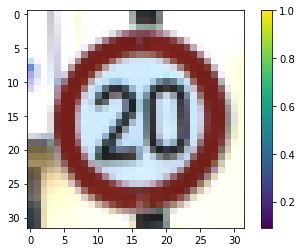

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Antes de entrenar la red neuronal debemos escalar estos valores en un rango de 0 a 1. Para hacero, dividimos los valores por 255. Es importante que el *training set* y el *testing set* se pre-procesen de la misma forma:

Para verificar que el set de datos está en el formato adecuado y que están listos para entrenar la red, veamos las primeras 25 imágenes de el *training set* junto al nombre de clase debajo de cada imagen.

In [ ]:
train_labels

array([ 0,  0,  0, ..., 42, 42, 42])

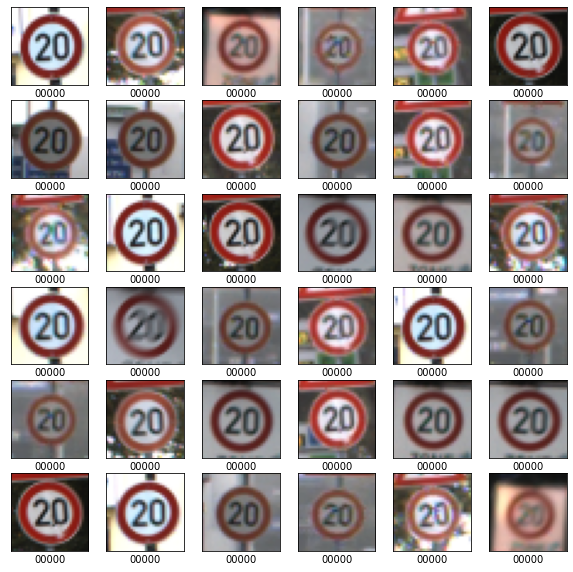

In [ ]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construir del Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilarlo.

### Configurar las Capas

Los bloques de construcción básicos de una red neuronal son las *capas* o *layers*. Las capas extraen representaciones (características o features) del set de datos con el que se alimentan.

La mayor parte del *aprendizaje profundo* (deep learning) consiste en encadenar capas simples. La mayoría de las capas tienen parámetros que son aprendidos durante el entrenamiento. En TensorFlow, estas capas son implementadas mediante `tf.keras.layers.Dense`.

###**ANN**

In [ ]:
modelANN = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32 ,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(43, activation='softmax')
])

In [ ]:
# from keras.utils.vis_utils import plot_model,model_to_dot
# plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
modelANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 43)                2795      
                                                                 
Total params: 203,627
Trainable params: 203,627
Non-trainable params: 0
_________________________________________________________________


La primera capa de esta red, `tf.keras.layers.Flatten`,
transforma las imágenes de un arreglo bi-dimensional (de 28x28 píxeles) a un arreglo uni-dimensional (de 28\*28 píxeles = 784 píxeles). En esta capa no hay parámetros que aprender, solo se *reformatea* el set de datos.

Despues de que los píxeles son "aplanados", el modelo consiste de una secuencia de dos capas `tf.keras.layers.Dense`. Estas están densamente conectadas, o completamente conectadas. La primera capa `Dense` tiene 128 nodos (o neuronas) con una *función de activación* del tipo *relu*. La segunda (y última) capa es una capa de 10 nodos on una *función de activación* de tipo *softmax*, que devuelve un arreglo de 10 probabilidades que suman 1. Cada nodo contiene una *calificación* que indica la probabilidad de que la imagen actual pertenezca a una de las 10 clases.

###ANN + Data augmentation

In [ ]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomRotation(0.1,input_shape=(32, 32 ,3)),
        keras.layers.RandomZoom(0.1),
    ]
)


In [ ]:
modelANNda = keras.Sequential([
    data_augmentation,
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(43, activation='softmax')
])

In [ ]:
modelANNda.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                196672    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 43)                2795      
                                                                 
Total params: 203,627
Trainable params: 203,627
Non-tr

### CNN

In [ ]:
modelCNN = keras.Sequential()
modelCNN.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
modelCNN.add(keras.layers.MaxPooling2D(2,2))
modelCNN.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
modelCNN.add(keras.layers.MaxPooling2D(2,2))
modelCNN.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
modelCNN.add(keras.layers.MaxPooling2D(2,2))
modelCNN.add(keras.layers.Flatten())
modelCNN.add(keras.layers.Dense(43, activation='softmax'))

In [ ]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


In [ ]:
modelCNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)        

### CNN + DA

In [ ]:
modelCNNDa = keras.Sequential()
modelCNNDa.add(data_augmentation)
modelCNNDa.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
modelCNNDa.add(keras.layers.MaxPooling2D(2,2))
modelCNNDa.add(keras.layers.Dropout(0.1))
modelCNNDa.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
modelCNNDa.add(keras.layers.MaxPooling2D(2,2))
modelCNNDa.add(keras.layers.Dropout(0.2))
modelCNNDa.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
modelCNNDa.add(keras.layers.MaxPooling2D(2,2))
modelCNNDa.add(keras.layers.Flatten())
modelCNNDa.add(keras.layers.Dense(43, activation='softmax'))

In [ ]:
modelCNNDa.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                  

### Activamos logs de metricas de entrenamiento

In [ ]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


### Compilar el modelo

Antes de que el modelo este listo para ser entrenado, se necesitan algunas configuraciones más. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function*: esto permite medir que tan exacto es el modelo durante el entrenamiento. La idea es minimizar el valor de esta función para "dirigir" el modelo en la direccion adecuada.
* *Optimizer*: así es como se actualiza el modelo basado en los datos de entrenamiento y su loss function.
* *Metrics*: se usan para monitorear los pasos de entrenamiento y de testeo. El siguiente ejemplo usa *accuracy* (exactitud), es decir, la fracción de imágenes que son correctamente clasificadas.

In [ ]:
loss=tf.losses.SparseCategoricalCrossentropy()
METRICS=['accuracy']

modelANN.compile(
        optimizer = 'Adam',
        loss=loss,
        metrics= METRICS)

In [ ]:
loss=tf.losses.SparseCategoricalCrossentropy()
METRICS=['accuracy']

modelANNda.compile(
        optimizer = 'Adam',
        loss=loss,
        metrics= METRICS)

In [ ]:
loss=tf.losses.SparseCategoricalCrossentropy()
METRICS=['accuracy']

modelCNN.compile(
        optimizer = 'Adam',
        loss=loss,
        metrics= METRICS)

In [ ]:
loss=tf.losses.SparseCategoricalCrossentropy()
METRICS=['accuracy']

modelCNNDa.compile(
        optimizer = 'Adam',
        loss=loss,
        metrics= METRICS)

## Entrenar el Modelo

Entrenar la red neuronal requiere de los siguientes pasos:

1. Entregar los datos de entrenamiento al modelo. En este ejemplo, el set de datos de entrenamiento estan en los arreglos `train_images` y `train_labels`.
2. Correr el entreanamiento para que el modelo aprenda a asociar imágenes con etiquetas.
3. Pedir al modelo que haga predicciones sobre un set de datos de pruebas, incluido en el arreglo `test_images`. Verificar que las predicciones sean iguales a las etiquetas del arreglo `test_labels`.

Para comenzar a entrenar, se llama el método `model.fit`. Se denomina así por que ajusta (*fit*) el modelo a el set de datos de entrenamiento:

In [ ]:
modelANN.fit(train_images,train_labels, epochs=20, callbacks=[tensorboard_callback])

Epoch 1/20
833/833 [==============================] - 5s 5ms/step - loss: 2.1814 - accuracy: 0.4256
Epoch 2/20
833/833 [==============================] - 4s 5ms/step - loss: 1.0282 - accuracy: 0.7161
Epoch 3/20
833/833 [==============================] - 4s 5ms/step - loss: 0.7367 - accuracy: 0.7925
Epoch 4/20
833/833 [==============================] - 4s 5ms/step - loss: 0.5825 - accuracy: 0.8381
Epoch 5/20
833/833 [==============================] - 4s 5ms/step - loss: 0.5077 - accuracy: 0.8610
Epoch 6/20
833/833 [==============================] - 4s 5ms/step - loss: 0.4421 - accuracy: 0.8807
Epoch 7/20
833/833 [==============================] - 4s 5ms/step - loss: 0.4106 - accuracy: 0.8891
Epoch 8/20
833/833 [==============================] - 4s 5ms/step - loss: 0.3895 - accuracy: 0.8939
Epoch 9/20
833/833 [==============================] - 4s 5ms/step - loss: 0.3733 - accuracy: 0.8996
Epoch 10/20
833/833 [==============================] - 4s 5ms/step - loss: 0.3260 - accuracy: 0.9134

In [ ]:
modelANNda.fit(train_images,train_labels, epochs=30,callbacks=[tensorboard_callback])

Epoch 1/30
833/833 [==============================] - 12s 13ms/step - loss: 2.8491 - accuracy: 0.2269
Epoch 2/30
833/833 [==============================] - 11s 13ms/step - loss: 1.9654 - accuracy: 0.4161
Epoch 3/30
833/833 [==============================] - 11s 13ms/step - loss: 1.6620 - accuracy: 0.4945
Epoch 4/30
833/833 [==============================] - 11s 13ms/step - loss: 1.5099 - accuracy: 0.5405
Epoch 5/30
833/833 [==============================] - 11s 13ms/step - loss: 1.4020 - accuracy: 0.5726
Epoch 6/30
833/833 [==============================] - 11s 13ms/step - loss: 1.3209 - accuracy: 0.6003
Epoch 7/30
833/833 [==============================] - 11s 13ms/step - loss: 1.2503 - accuracy: 0.6228
Epoch 8/30
833/833 [==============================] - 12s 14ms/step - loss: 1.2292 - accuracy: 0.6300
Epoch 9/30
833/833 [==============================] - 11s 13ms/step - loss: 1.1817 - accuracy: 0.6446
Epoch 10/30
833/833 [==============================] - 11s 13ms/step - loss: 1.156

In [ ]:
modelCNN.fit(train_images,train_labels, epochs=3,callbacks=[tensorboard_callback])

Epoch 1/3
833/833 [==============================] - 35s 42ms/step - loss: 1.5656 - accuracy: 0.5755
Epoch 2/3
833/833 [==============================] - 34s 41ms/step - loss: 0.3240 - accuracy: 0.9119
Epoch 3/3
833/833 [==============================] - 35s 42ms/step - loss: 0.1611 - accuracy: 0.9573


In [ ]:
modelCNNDa.fit(train_images,train_labels, epochs=30,callbacks=[tensorboard_callback])

Epoch 1/30
833/833 [==============================] - 46s 54ms/step - loss: 2.3120 - accuracy: 0.3432
Epoch 2/30
833/833 [==============================] - 46s 56ms/step - loss: 1.1424 - accuracy: 0.6393
Epoch 3/30
833/833 [==============================] - 45s 54ms/step - loss: 0.7489 - accuracy: 0.7646
Epoch 4/30
833/833 [==============================] - 45s 54ms/step - loss: 0.5411 - accuracy: 0.8331
Epoch 5/30
833/833 [==============================] - 46s 55ms/step - loss: 0.4196 - accuracy: 0.8718
Epoch 6/30
833/833 [==============================] - 46s 55ms/step - loss: 0.3529 - accuracy: 0.8911
Epoch 7/30
833/833 [==============================] - 45s 54ms/step - loss: 0.2982 - accuracy: 0.9089
Epoch 8/30
833/833 [==============================] - 44s 53ms/step - loss: 0.2689 - accuracy: 0.9164
Epoch 9/30
833/833 [==============================] - 45s 54ms/step - loss: 0.2382 - accuracy: 0.9278
Epoch 10/30
833/833 [==============================] - 44s 53ms/step - loss: 0.224

## Evaluamos desempeño en entrenamiento

Visualizamos los datos obtenidos de usar TFProfiling para analizar el desempeño de entrenamiento de la red, para estimar costo

In [ ]:
!tar -cvzf logs.tar.gz logs/

logs/
logs/20221128-191906/
logs/20221128-191906/train/
logs/20221128-191906/train/events.out.tfevents.1669663146.b54337e9588f.72.0.v2
logs/20221128-191906/train/events.out.tfevents.1669663672.b54337e9588f.72.2.v2
logs/20221128-191906/train/events.out.tfevents.1669663776.b54337e9588f.72.3.v2
logs/20221128-191906/train/events.out.tfevents.1669663289.b54337e9588f.72.1.v2


## Evaluar Accuracy

A continuación vamos a estimar el rendimiento del modelo sobre el set de datos de prueba:

In [ ]:
test_loss, test_acc = modelANN.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

395/395 - 1s - loss: 1.2226 - accuracy: 0.8006 - 1s/epoch - 3ms/step

Test accuracy: 0.8005542159080505


In [ ]:
test_loss, test_acc = modelANNda.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

395/395 - 1s - loss: 0.9552 - accuracy: 0.7702 - 976ms/epoch - 2ms/step

Test accuracy: 0.7702296376228333


In [ ]:
test_loss, test_acc = modelCNN.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

395/395 - 5s - loss: 0.7071 - accuracy: 0.8637 - 5s/epoch - 12ms/step

Test accuracy: 0.8637371063232422


In [ ]:
test_loss, test_acc = modelCNNDa.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

395/395 - 5s - loss: 0.4217 - accuracy: 0.9211 - 5s/epoch - 12ms/step

Test accuracy: 0.9210609793663025


### Visualización de imágenes junto con predicciones

Por último vamos crear una función que nos permita graficar la probabilidad de clase de cada una de las imagenes del dataset de pruebas.



In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(len(predictions_array)))
  plt.yticks([])
  thisplot = plt.bar(range(len(predictions_array)), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Testing manual

In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: dataset/00005_1.jpg     
  inflating: dataset/00011_0.jpg     
  inflating: dataset/00004_0.jpg     
  inflating: dataset/00011_2.jpg     
  inflating: dataset/00003_1.jpg     
  inflating: dataset/00006_1.jpg     
  inflating: dataset/00003_0.jpg     
  inflating: dataset/00002_3.jpg     
  inflating: dataset/00009_0.jpg     
  inflating: dataset/00020_0.jpg     
  inflating: dataset/00008_1.jpg     
  inflating: dataset/00015_2.jpg     
  inflating: dataset/00000_2.jpg     
  inflating: dataset/00019_0.jpg     
  inflating: dataset/00007_0.jpg     
  inflating: dataset/00019_2.jpg     
  inflating: dataset/00007_2.jpg     
  inflating: dataset/00005_2.jpg     
  inflating: dataset/00013_2.jpg     
  inflating: dataset/00017_0.jpg     
  inflating: dataset/00000_1.jpg     
  inflating: dataset/00007_1.jpg     
  inflating: dataset/00003_2.jpg     
  inflating: dataset/00006_0.jpg     
  inflating: dataset/00005_0.jpg     
  inflating: dataset/00017_2

In [ ]:
manual_testing_path = 'dataset'

test_files = np.sort(os.listdir(manual_testing_path))

images_test_m = []
classnames_test_m = []

for file in test_files:
  print(file)
  img = cv2.imread(manual_testing_path + '/' + file)
  img = cv2.resize(img,(32,32), interpolation = cv2.INTER_AREA)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img/255.0
  images_test_m.append(img)
  classnames_test_m.append(int(file[:5]))

00000_0.jpg
00000_1.jpg
00000_2.jpg
00001_0.jpg
00001_1.jpg
00001_2.jpg
00002_0.jpg
00002_1.jpg
00002_3.jpg
00003_0.jpg
00003_1.jpg
00003_2.jpg
00004_0.jpg
00005_0.jpg
00005_1.jpg
00005_2.jpg
00006_0.jpg
00006_1.jpg
00006_2.jpg
00007_0.jpg
00007_1.jpg
00007_2.jpg
00008_0.jpg
00008_1.jpg
00008_2.jpg
00009_0.jpg
00009_1.jpg
00009_2.jpg
00010_0.jpg
00010_1.jpg
00010_2.jpg
00011_0.jpg
00011_1.jpg
00011_2.jpg
00012_0.jpg
00012_2.jpg
00013_0.jpg
00013_2.jpg
00014_0.jpg
00015_0.jpg
00015_1.jpg
00015_2.jpg
00016_0.jpg
00016_1.jpg
00016_2.jpg
00017_0.jpg
00017_1.jpg
00017_2.jpg
00018_0.jpg
00019_0.jpg
00019_1.jpg
00019_2.jpg
00020_0.jpg
00020_1.jpg
00021_1.jpg
00022_0.webp
00022_1.webp
00022_2.webp
00023_0.webp
00023_1.webp
00023_2.webp
00024_0.webp
00024_1.webp
00024_2.webp
00025_0.jpg
00025_1.webp
00025_2.webp
00026_0.webp
00026_1.webp
00026_2.webp
00027_0.webp
00027_1.webp
00027_2.webp
00028_0.webp
00028_1.webp
00028_2.webp
00029_0.webp
00029_1.webp
00029_2.webp
00030_0.webp
00030_2.webp
000

In [ ]:
test_images,test_labels = np.asarray(images_test_m).astype(np.float32),np.asarray(classnames_test_m)

## Hacer predicciones

Finalmente, con el modelo entrenado ya se pueden hacer predicciones sobre nuevas imágenes. Para esto usamos el método `predict` con las imágenes del conjunto de testeo.

In [ ]:
predictionsANN = modelANN.predict(test_images)

4/4 [==============================] - 0s 3ms/step


In [ ]:
predictionsANNda = modelANNda.predict(test_images)

4/4 [==============================] - 0s 4ms/step


In [ ]:
predictionsCNN = modelCNN.predict(test_images)

4/4 [==============================] - 0s 13ms/step


In [ ]:
predictionsCNNDa = modelCNNDa.predict(test_images)

4/4 [==============================] - 0s 12ms/step


Tomemos como ejemplos la primer imagen del conjunto de testeo (`i=0`) y la décimotercera (`i=12`). Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje para la etiqueta predicha.

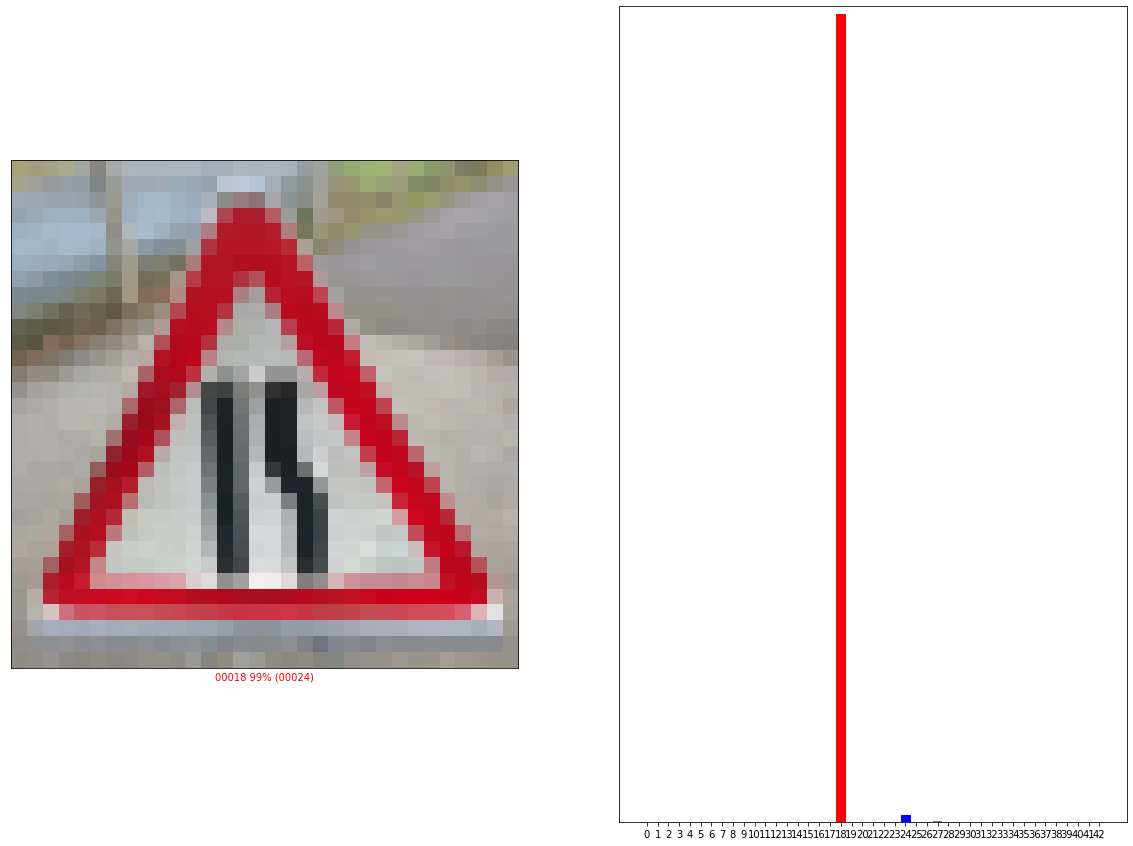

In [ ]:
i = 63
prediction = predictionsCNNDa[i]


plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction,  test_labels)
plt.show()

Ahora vamos a graficar multiples imágenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

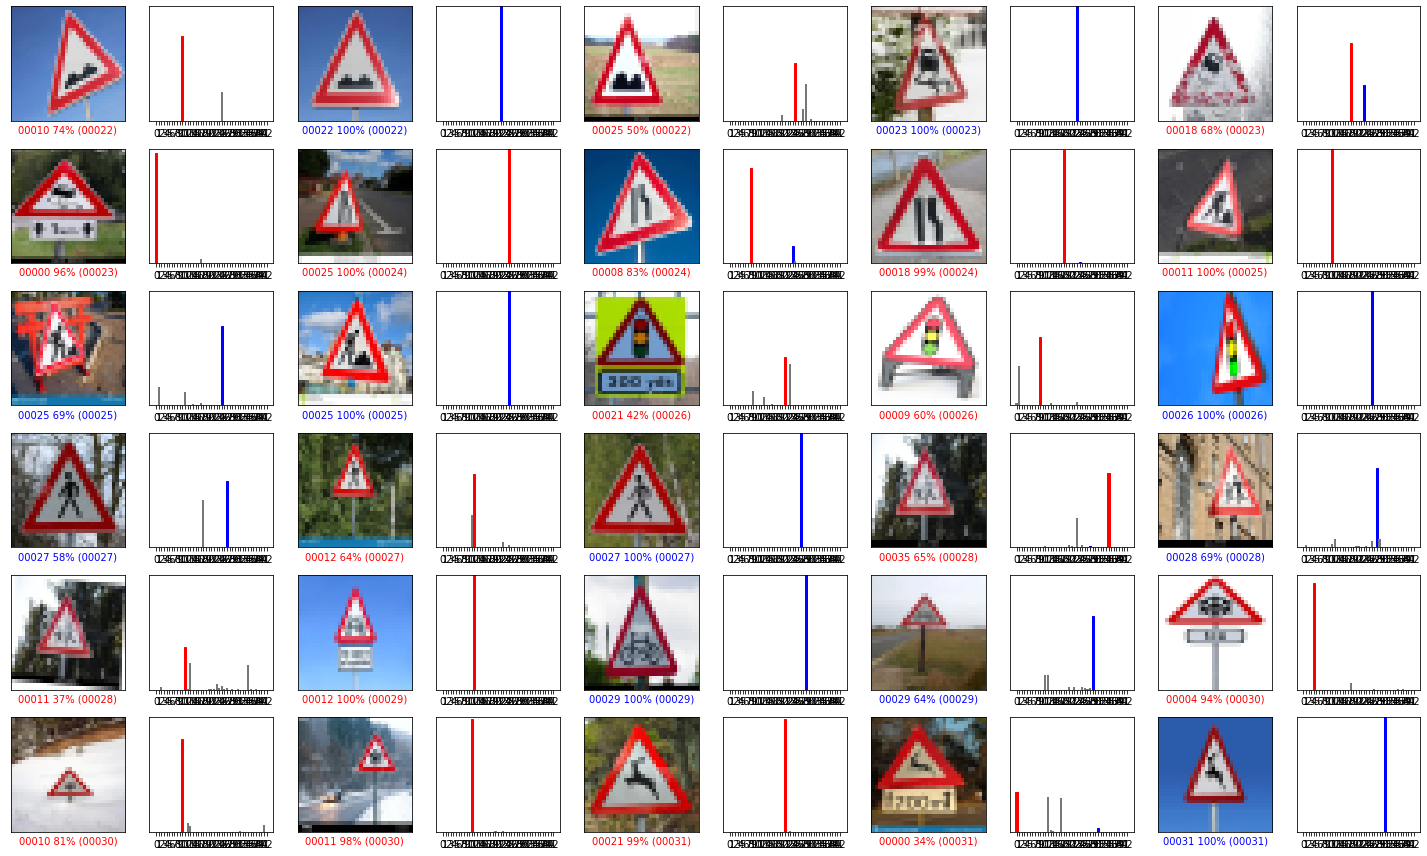

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

predictions = predictionsCNNDa
num_rows = 6
num_cols = 5
offset = 55

num_images = num_rows*num_cols
plt.figure(figsize=(4*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i+offset, predictions[i+offset], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i+offset, predictions[i+offset], test_labels)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una predicción sobre una única imagen.

## Métricas de comparación

### ANN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


,class,precision,recall,f1_score
0,00000,0.000000,0.000000,NaN
1,00001,0.142857,0.333333,0.200000
2,00002,0.000000,0.000000,NaN
3,00003,0.000000,0.000000,NaN
4,00004,NaN,0.000000,NaN
5,00005,0.000000,0.000000,NaN
6,00006,NaN,0.000000,NaN
7,00007,1.000000,0.333333,0.500000
8,00008,1.000000,0.333333,0.500000
9,00009,0.666667,0.666667,0.666667


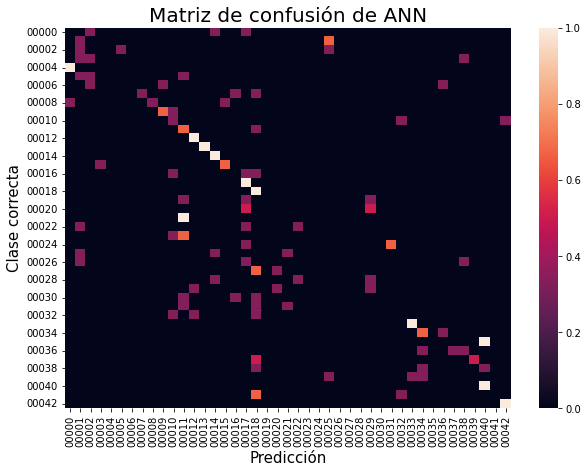

In [ ]:
#matriz de confusion

conf_matrix = confusion_matrix(test_labels, predictionsANN.argmax(axis=1))
conf_matrix = np.array([conf_matrix[i] / conf_matrix.astype(np.float32).sum(axis=1)[i] for i in range(len(conf_matrix))])
df_cm = pd.DataFrame(conf_matrix, index = class_names, columns = class_names)
plt.figure(figsize = (10,7))
ax = plt.axes()
sn.heatmap(df_cm, annot=False, ax = ax)
ax.set_title('Matriz de confusión de ANN',fontdict = {'fontsize': 20})
plt.ylabel('Clase correcta',fontdict = {'fontsize': 15})
plt.xlabel('Predicción',fontdict =  {'fontsize': 15})

precision = np.array([conf_matrix[i,i]/np.sum(conf_matrix[:,i]) for i in range(len(conf_matrix))])
recall = np.array([conf_matrix[i,i]/np.sum(conf_matrix[i,:]) for i in range(len(conf_matrix))])
f1_score = np.array([2 * precision[i] * recall[i] /(precision[i] + recall[i]) for i in range(len(conf_matrix))])

dataframe = zip(class_names,precision,recall,f1_score)
df = pd.DataFrame(data = dataframe , columns = ['class','precision','recall','f1_score'])

df


### ANN + DA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


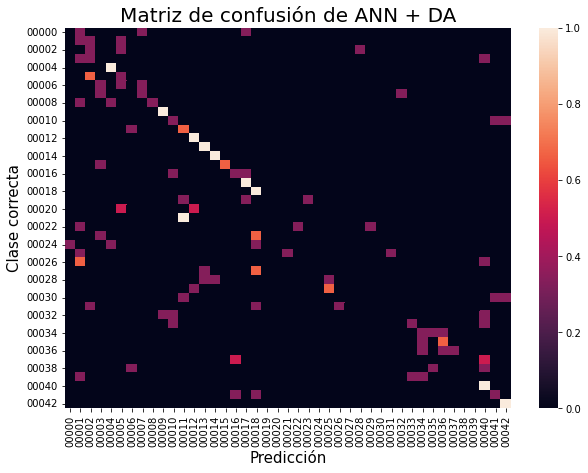

In [ ]:
#matriz de confusion


conf_matrix = confusion_matrix(test_labels, predictionsANNda.argmax(axis=1))
conf_matrix = np.array([conf_matrix[i] / conf_matrix.astype(np.float32).sum(axis=1)[i] for i in range(len(conf_matrix))])
df_cm = pd.DataFrame(conf_matrix, index = class_names, columns = class_names)
plt.figure(figsize = (10,7))
ax = plt.axes()
sn.heatmap(df_cm, annot=False, ax = ax)
ax.set_title('Matriz de confusión de ANN + DA',fontdict = {'fontsize': 20})
plt.ylabel('Clase correcta',fontdict = {'fontsize': 15})
plt.xlabel('Predicción',fontdict =  {'fontsize': 15})

precision = np.array([conf_matrix[i,i]/np.sum(conf_matrix[:,i]) for i in range(len(conf_matrix))])
recall = np.array([conf_matrix[i,i]/np.sum(conf_matrix[i,:]) for i in range(len(conf_matrix))])
f1_score = np.array([2 * precision[i] * recall[i] /(precision[i] + recall[i]) for i in range(len(conf_matrix))])

dataframe = zip(class_names,precision,recall,f1_score)
df = pd.DataFrame(data = dataframe , columns = ['class','precision','recall','f1_score'])

df
print()


### CNN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


,class,precision,recall,f1_score
0,00000,0.000000,0.000000,NaN
1,00001,0.500000,0.333333,0.400000
2,00002,0.000000,0.000000,NaN
3,00003,0.200000,0.333333,0.250000
4,00004,0.000000,0.000000,NaN
5,00005,0.000000,0.000000,NaN
6,00006,NaN,0.000000,NaN
7,00007,0.500000,0.333333,0.400000
8,00008,0.000000,0.000000,NaN
9,00009,0.250000,0.666667,0.363636


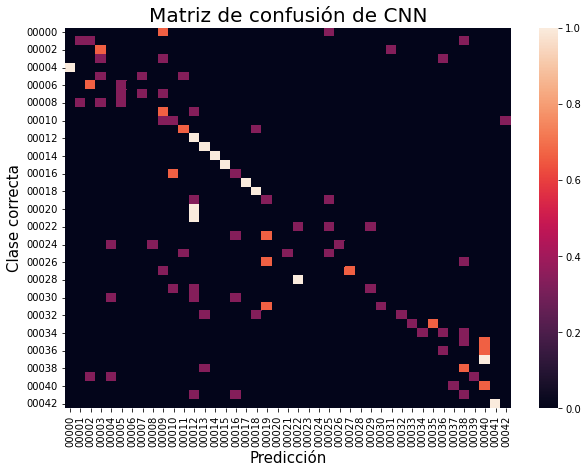

In [ ]:
#matriz de confusion


conf_matrix = confusion_matrix(test_labels, predictionsCNN.argmax(axis=1))
conf_matrix = np.array([conf_matrix[i] / conf_matrix.astype(np.float32).sum(axis=1)[i] for i in range(len(conf_matrix))])
df_cm = pd.DataFrame(conf_matrix, index = class_names, columns = class_names)
plt.figure(figsize = (10,7))
ax = plt.axes()
sn.heatmap(df_cm, annot=False, ax = ax)
ax.set_title('Matriz de confusión de CNN',fontdict = {'fontsize': 20})
plt.ylabel('Clase correcta',fontdict = {'fontsize': 15})
plt.xlabel('Predicción',fontdict =  {'fontsize': 15})

precision = np.array([conf_matrix[i,i]/np.sum(conf_matrix[:,i]) for i in range(len(conf_matrix))])
recall = np.array([conf_matrix[i,i]/np.sum(conf_matrix[i,:]) for i in range(len(conf_matrix))])
f1_score = np.array([2 * precision[i] * recall[i] /(precision[i] + recall[i]) for i in range(len(conf_matrix))])

dataframe = zip(class_names,precision,recall,f1_score)
df = pd.DataFrame(data = dataframe , columns = ['class','precision','recall','f1_score'])

df


### CNN + DA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


,class,precision,recall,f1_score
0,00000,0.000000,0.000000,NaN
1,00001,1.000000,0.666667,0.800000
2,00002,0.000000,0.000000,NaN
3,00003,NaN,0.000000,NaN
4,00004,0.000000,0.000000,NaN
5,00005,0.250000,0.333333,0.285714
6,00006,NaN,0.000000,NaN
7,00007,NaN,0.000000,NaN
8,00008,0.500000,0.333333,0.400000
9,00009,0.500000,0.666667,0.571429


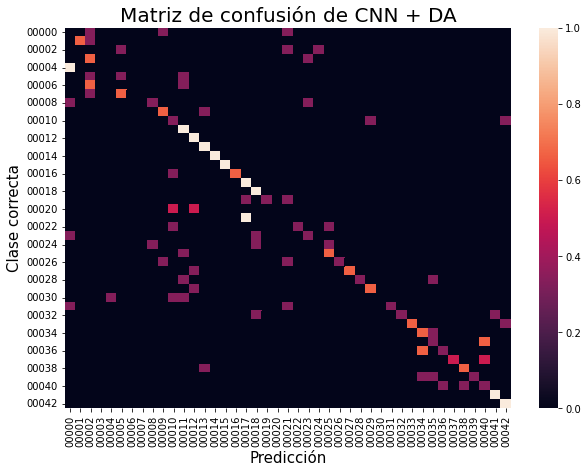

In [ ]:
#matriz de confusion


conf_matrix = confusion_matrix(test_labels, predictionsCNNDa.argmax(axis=1))
conf_matrix = np.array([conf_matrix[i] / conf_matrix.astype(np.float32).sum(axis=1)[i] for i in range(len(conf_matrix))])
df_cm = pd.DataFrame(conf_matrix, index = class_names, columns = class_names)
plt.figure(figsize = (10,7))
ax = plt.axes()
sn.heatmap(df_cm, annot=False, ax = ax)
ax.set_title('Matriz de confusión de CNN + DA',fontdict = {'fontsize': 20})
plt.ylabel('Clase correcta',fontdict = {'fontsize': 15})
plt.xlabel('Predicción',fontdict =  {'fontsize': 15})

precision = np.array([conf_matrix[i,i]/np.sum(conf_matrix[:,i]) for i in range(len(conf_matrix))])
recall = np.array([conf_matrix[i,i]/np.sum(conf_matrix[i,:]) for i in range(len(conf_matrix))])
f1_score = np.array([2 * precision[i] * recall[i] /(precision[i] + recall[i]) for i in range(len(conf_matrix))])

dataframe = zip(class_names,precision,recall,f1_score)
df = pd.DataFrame(data = dataframe , columns = ['class','precision','recall','f1_score'])

df
